# IND5003 Enron Project
## Contents of this Jupyter Notebook
### Dataset
Dataset from Prof: 
(https://www.cs.cmu.edu/~./enron/)
- Unstructured Dataset containing raw text in the form of emails
**Make sure that the dataset 'maildir' is in the same directory as your project on your own system. Else this would not work**

## Approach to this Project

### Research Questions
(Use research questions to provide a narrative and storyline in our analysis of the Enron Email Corpus)

We would be taking a broad to narrow approach in terms of the narrative that we are looking to create. 

Some research questions that we would be hoping to analyse in this project are:
1. Are there any topical shifts that we can identify prior, leading up to and after the fraud has been exposed?
2. Can we detect sentiment shifts and anomalies in communication patterns leading up to, during and after the exposure of the fraud?
3. Identification of key individuals involved in the key discussions and anomalies in their comms patterns

#### Timeline

We have an intention to split our analysis into 3 defined timeframes:
1. Pre-Crisis (June 1999 - Aug 2001)
2. During Crisis (Sep 2000 - Oct 2001 )
3. Post Crisis (Nov 2001 - June 2002)

These research questions would be answered using a variety of NLP and Unsupervised Learning Techniques. 

*** [GUYS WE NEED TO THINK OF THE TECHNIQUES] ***
1. t-sne for initial identification of clusters
2. LDA for topic identification
3. Named entity recognition for trends in any entity
4. Sentimental Analysis
5. Anomaly detection (HOW?) 
6. Information retrieval to identify relevant individuals

### Overall Steps to Tackle this Project
1. Data Extraction
2. Data Cleaning & Preprocessing
3. Initial Data Exploration
    - Sender Frequency Analysis
    - Number of Emails Across Time
    - General topic modeling
    - General sentiment analysis
    - Word Cloud & Bar Charts for the Top Senders (20%)
    - Network Graph
    - t-sne graph
4. Research Questions
    1. Temporal Topical shifts using LDA Topic Modeling
    2. Temporal Sentimental Analysis - Segment the emails by quarters. Look at the way communication changes over time.
    3. Anomaly detection using?
    4. Key individual detection using?

    

## Section 1: Data Extraction
- Extract the emails from the unstructured raw folder


In [1]:
# Import the relevant libraries required for Section 1
import os # Required for directory traversal
import pandas as pd
import email
from email import policy
from email.parser import BytesParser
from collections import defaultdict
from itertools import islice

# additional libraries added for possible usage
import numpy as np
import pprint
import nltk
import re
import gensim
from gensim.parsing.preprocessing import *
import gensim.downloader as api
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import manifold

from transformers import pipeline

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import plotly.express as px


In [126]:
# # Set the maildir path to the respective paths in your system 
# # ! Note that maildir should be in the same directory as your project on your own system, would change if you are using windows
# maildir_path = '/Users/Dylan/Documents/IND5003/Projects/maildir'

In [127]:
# # Create a list of all the directories in the maildir for sanity check
# maildir_list = os.listdir(maildir_path)
# print(maildir_list)

In [128]:
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=10, max_emails=50):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))
#             if len(file_paths) >= max_emails:
#                 break
#         if len(file_paths) >= max_emails:
#             break

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=10, max_emails=50)

# # Display the DataFrame
# print(emails_df.head())

In [129]:

# # ! This is a very large dataset and will take a long time to run
# # ! DO NOT RUN THIS FOR FUN UNLESS YOU WANT YOUR COMPUTER TO CRASH
# def parse_email(file_path):
#     try:
#         with open(file_path, 'rb') as f:
#             msg = BytesParser(policy=policy.default).parse(f)
        
#         # Extract fields from the email
#         email_from = msg['From']
#         email_to = msg['To']
#         email_date = msg['Date']
#         email_subject = msg['Subject']
#         email_body = msg.get_body(preferencelist=('plain')).get_content() if msg.get_body(preferencelist=('plain')) else ''
        
#         return [email_from, email_to, email_date, email_subject, email_body]
#     except Exception as e:
#         print(f"Error parsing file {file_path}: {e}")
#         return None

# def batch_iterator(iterator, batch_size):
#     """Yield batches of specified size from an iterator."""
#     while True:
#         batch = list(islice(iterator, batch_size))
#         if not batch:
#             break
#         yield batch

# def load_emails(maildir_path, batch_size=1000):
#     email_data = []
#     file_paths = []

#     # Walk through the directory to collect file paths
#     for root, dirs, files in os.walk(maildir_path):
#         for file in files:
#             if file == '.DS_Store' or file.startswith('.'):
#                 continue  # Skip system files and hidden files
#             file_paths.append(os.path.join(root, file))

#     # Process emails in batches
#     for batch in batch_iterator(iter(file_paths), batch_size):
#         batch_data = []
#         for file_path in batch:
#             result = parse_email(file_path)
#             if result is not None:
#                 batch_data.append(result)
        
#         # Append batch data to the main list
#         email_data.extend(batch_data)

#     # Create a DataFrame from the extracted data
#     df = pd.DataFrame(email_data, columns=['From', 'To', 'Date', 'Subject', 'Body'])
#     return df

# # Load and parse emails
# emails_df = load_emails(maildir_path, batch_size=1000)

# # Display the DataFrame
# print(emails_df.head())

### Loading the Data into a Pandas DF

In [130]:
# Convert emails_df to a CSV file
# Save the DataFrame as a CSV file in the specified directory

#emails_df.to_csv('/Users/Dylan/Documents/IND5003/Projects/emails_uncleaned.csv', index=False)


In [131]:
# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

# Load the CSV file back into a DataFrame

# PLEASE CHANGE IT TO YOUR OWN DIRECTORY IN YOUR OWN SYSTEM 

enron_uncleaned_emails = pd.read_csv('/Users/Dylan/Documents/IND5003/Projects/enron_emails_uncleaned.csv')

In [132]:
enron_uncleaned_emails.head()

,From,To,Date,Subject,Body
0,msagel@home.com,jarnold@enron.com,"Thu, 16 Nov 2000 09:30:00 -0800",Status,John:\n?\nI'm not really sure what happened be...
1,slafontaine@globalp.com,john.arnold@enron.com,"Fri, 08 Dec 2000 05:05:00 -0800",re:summer inverses,i suck-hope youve made more money in natgas la...
2,iceoperations@intcx.com,"icehelpdesk@intcx.com, internalmarketing@intcx...","Tue, 15 May 2001 09:43:00 -0700",The WTI Bullet swap contracts,"Hi,\n\n\n Following the e-mail you have rece..."
3,jeff.youngflesh@enron.com,"anthony.gilmore@enron.com, colleen.koenig@enro...","Mon, 27 Nov 2000 01:49:00 -0800",Invitation: EBS/GSS Meeting w/Bristol Babcock ...,Conference Room TBD. \n\nThis meeting will be...
4,caroline.abramo@enron.com,mike.grigsby@enron.com,"Tue, 12 Dec 2000 09:33:00 -0800",Harvard Mgmt,Mike- I have their trader coming into the offi...


In [133]:
# # Find "kitchen" in the column "From"

# # This is to determine that there are still emails sent from louise kitchen despite the original parsing error due to the encoding of the email
# kitchen_emails = enron_uncleaned_emails[enron_uncleaned_emails['From'].str.contains('kitchen', case=False, na=False)]
# print(kitchen_emails)

## Section 2: Data Preprocessing
### Start with the Cleaning
* Check for any nulls
* Drop the missing values
* Remove the duplicates
* Format the dates 



In [134]:
# Check for Nulls in Each Column
missing_values = enron_uncleaned_emails.isnull().sum()
missing_values_df = pd.DataFrame({'Column': missing_values.index, 'Missing Values': missing_values.values})
print(missing_values_df)

    Column  Missing Values
0     From               0
1       To           21847
2     Date               0
3  Subject           19187
4     Body               0


In [135]:
# Description of the DataFrame
enron_uncleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,495549,517396,498209,517396
unique,20326,58556,224119,159286,249020
top,kay.mann@enron.com,pete.davis@enron.com,"Wed, 27 Jun 2001 16:02:00 -0700",RE:,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,9155,1118,6477,112


In [136]:
# Fill out the missing values with empty strings
enron_cleaned_emails = enron_uncleaned_emails.fillna('')

In [137]:
# Post cleaning Check
missing_values_check = enron_cleaned_emails.isnull().sum()
missing_values_df_check = pd.DataFrame({'Column': missing_values_check.index, 'Missing Values': missing_values_check.values})
print(missing_values_df_check)

    Column  Missing Values
0     From               0
1       To               0
2     Date               0
3  Subject               0
4     Body               0


In [138]:
# Describe the cleaned DataFrame
enron_cleaned_emails.describe()

,From,To,Date,Subject,Body
count,517396,517396,517396,517396,517396
unique,20326,58557,224119,159287,249020
top,kay.mann@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,"As you know, Enron Net Works (ENW) and Enron G..."
freq,16735,21847,1118,19187,112


* From running the code above, the output would show that there are 249020 emails with unique bodies out of the 517396 emails. 
    * This means that ~51.9% of emails in the uncleaned dataframe are not unique
    * This would ensure that the subsequent analytical metrics (when performing LDA, TFIDF, Word2vec) are not inflated. 

In [139]:
# Remove duplicate emails based on the 'Body' column, keeping only the first occurrence
enron_cleaned_emails_body_unique = enron_cleaned_emails.drop_duplicates(keep='first')
# Describe the DataFrame after removing duplicates
enron_cleaned_emails_body_unique.describe()

,From,To,Date,Subject,Body
count,255488,255488,255488,255488,255488
unique,20326,58557,224119,159287,249020
top,jeff.dasovich@enron.com,,"Wed, 27 Jun 2001 16:02:00 -0700",,test
freq,5530,9989,1118,8766,40


In [140]:
# # When running the code block above, i observed that jeff dasovich sent the most emails. 
# # Now i want to explore the number of emails he sent
# # Filter emails where 'From' is 'jeff.dasovich@enron.com'
# jeff_emails = enron_cleaned_emails_body_unique[enron_cleaned_emails_body_unique['From'] == 'jeff.dasovich@enron.com']

# # Count the number of emails he sent
# jeff_emails_count = jeff_emails.shape[0]

# # Display the count
# print(f"Jeff Dasovich sent {jeff_emails_count} emails.")

# # Display the first few rows of Jeff's emails
# jeff_emails.head()


In [141]:
# Convert the Date column to a pandas datetime object in the deduplicated dataframe
enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=True)

# Print the types of each column to ensure that the Date column is now a datetime object
print(enron_cleaned_emails_body_unique.dtypes)

From       object
To         object
Date       object
Subject    object
Body       object
dtype: object


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_37347/3657851918.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=False)
/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_37347/3657851918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date

In [142]:
# Extract the 'Year' from the 'Date' column
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year

# Convert the 'Year' column to an integer type if necessary
enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Year'].astype('Int64')

# Count the number of emails sent per year and sort the index (years)
emails_per_year = enron_cleaned_emails_body_unique['Year'].value_counts().sort_index()

# Create a DataFrame to hold the year and the number of emails
emails_per_year_df = pd.DataFrame({'Year': emails_per_year.index, 'Emails': emails_per_year.values})

# Print the resulting DataFrame
print(emails_per_year_df)

From                          object
To                            object
Date       datetime64[ns, UTC-08:00]
Subject                       object
Body                          object
dtype: object
    Year  Emails
0   1979     292
1   1986       1
2   1997      20
3   1998      88
4   1999    2011
5   2000   29288
6   2001   63255
7   2002   26999
8   2004      66
9   2005       1
10  2007       1
11  2012       2
12  2020       2
13  2043       1
14  2044       3


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_37347/1683169862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Date'] = pd.to_datetime(enron_cleaned_emails_body_unique['Date'], errors='coerce', utc=False)
/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_37347/1683169862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Year'] = enron_cleaned_emails_body_unique['Date'].dt.year
/var/folders/mg/37xvz49s5ybb842_sy2s

In [143]:
# Create another column with the months of each row using the deduplicated dataframe
enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')

# Group the dataframe by Year and Month and count the number of emails (using 'From' as the count reference)
emails_per_month_year = enron_cleaned_emails_body_unique.groupby(['Year', 'Month']).count()['From']

# Print the resulting grouped data
print(emails_per_month_year)


/var/folders/mg/37xvz49s5ybb842_sy2sm9500000gp/T/ipykernel_37347/703201955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enron_cleaned_emails_body_unique['Month'] = enron_cleaned_emails_body_unique['Date'].dt.month.astype('Int64')


Year  Month
1979  12         292
1986  4            1
1997  1            1
      3           10
      10           1
      11           8
1998  1            2
      10           4
      11          28
      12          54
1999  1           65
      2           43
      3           50
      4            7
      10           1
      11         593
      12        1252
2000  1         2163
      2         2477
      3         2999
      10         879
      11       10706
      12       10064
2001  1         8289
      2         8438
      3        10594
      4            4
      5            1
      6            2
      7            1
      8           13
      9            9
      10        3803
      11       22392
      12        9709
2002  1        17202
      2         6661
      3         2917
      4          218
      12           1
2004  2           66
2005  12           1
2007  2            1
2012  11           2
2020  12           2
2043  12           1
2044  1            3
N

In [144]:
# Check the number of emails in 2002 divided by month
emails_per_month_year[2002]

Month
1     17202
2      6661
3      2917
4       218
12        1
Name: From, dtype: int64

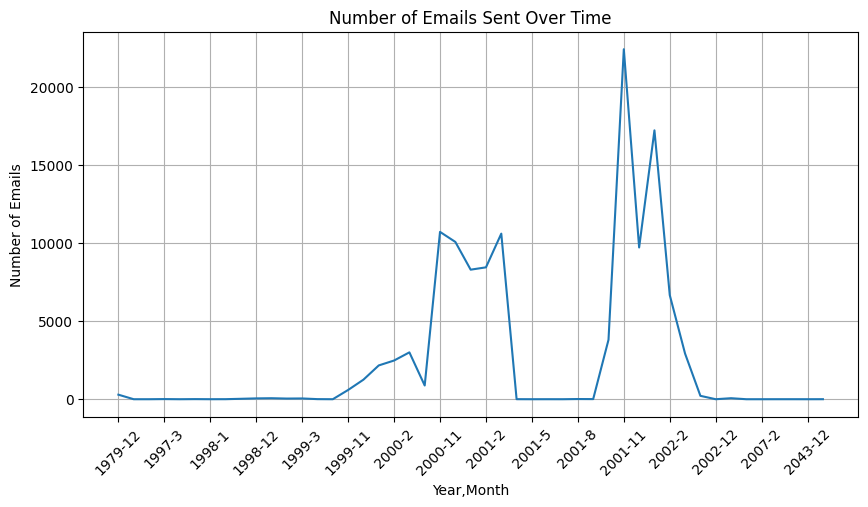

In [145]:
# Create large plot size
plt.figure(figsize=(10, 5))
emails_per_month_year.plot()
# Add tick marks in the x axis for every 3 months
plt.xticks(np.arange(0, len(emails_per_month_year), step=3), rotation=45,
           labels=[f"{year}-{month}" for year, month in emails_per_month_year.index][::3])
plt.ylabel('Number of Emails')
plt.title('Number of Emails Sent Over Time')
plt.grid()
plt.show()

In [158]:
import ssl
import certifi
ssl._create_default_https_context = ssl._create_unverified_context

# Download necessary datasets
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize the lemmatizer
wn = WordNetLemmatizer()

# Function to map NLTK's POS tags to WordNet POS tags
def get_wordnet_pos(word):
    """Get POS tag for lemmatization from NLTK's tag"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,  # Adjective
                "N": wordnet.NOUN, # Noun
                "V": wordnet.VERB, # Verb
                "R": wordnet.ADV}  # Adverb
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if the tag is not found


[nltk_data] Downloading package wordnet to /Users/Dylan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Dylan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [159]:
# Define function for cleaning and preprocessing the emails
def clean_the_mails(text):
    # Convert all the text to lowercase
    text = text.lower()
    
    # Remove all the special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text into words
    tokens = text.split()
    
    # Apply POS tagging and lemmatize each word
    tokens = [wn.lemmatize(word, get_wordnet_pos(word)) for word in tokens]
    
    # Rejoin the tokens into a single string
    return ' '.join(tokens)


In [160]:
# Example sentence to clean and lemmatize
example_text = "This Lou pai loves strippers as side quest to helping Jeff Skiling."

# Clean and lemmatize the text
cleaned_text = clean_the_mails(example_text)

print("Original text:", example_text)
print("Cleaned and lemmatized text:", cleaned_text)


Original text: This Lou pai loves strippers as side quest to helping Jeff Skiling.
Cleaned and lemmatized text: this lou pai love stripper a side quest to help jeff skiling


In [1]:
# # Applying the clean mail function to the Body column and import to csv for future usage

# # Apply the clean_the_mails function to the 'Body' column of your email dataset
# enron_cleaned_emails_body_unique['Cleaned_Body'] = enron_cleaned_emails_body_unique['Body'].apply(clean_the_mails)

# # Save the DataFrame with the cleaned data to a CSV file for future use
# enron_cleaned_emails_body_unique.to_csv('enron_cleaned_emails_with_cleaned_body.csv', index=False)

# # Display the first few rows of the DataFrame to inspect the cleaned and lemmatized results
# enron_cleaned_emails_body_unique[['Body', 'Cleaned_Body']].head()

## Splitting into Different Time Frames

In [2]:
# Import the cleaned data from the CSV file
enron_corpus = pd.read_csv('../data/enron_cleaned_emails_with_cleaned_body.csv')

In [ ]:
# Change enron corpus dataframe Date column to datetime object
enron_corpus['Date'] = pd.to_datetime(enron_corpus['Date'], errors='coerce', utc=True)

# Print dtypes of enron corpus dataframe
print(enron_corpus.dtypes)

In [3]:
# Divide the enron_corpus into 3 dataframes

# The first dataframe for dates between June 1999 and August 2000 (Pre-crisis)
enron_pre_crisis = enron_corpus[(enron_corpus['Date'] >= '1999-06-01') & (enron_corpus['Date'] <= '2000-08-31')]

# The second dataframe for dates between Sep 2000 to Oct 2001 (During crisis)
enron_during_crisis = enron_corpus[(enron_corpus['Date'] >= '2000-09-01') & (enron_corpus['Date'] <= '2001-10-31')]

# The third dataframe for dates between November 2001 to June 2002 (Post-crisis)
enron_post_crisis = enron_corpus[(enron_corpus['Date'] >= '2001-11-01') & (enron_corpus['Date'] <= '2002-06-30')]

# Print the shape of each dataframe
print(enron_pre_crisis.shape)
print(enron_during_crisis.shape)
print(enron_post_crisis.shape)


(33980, 8)
(157792, 8)
(61382, 8)


# Q1 Topic Identification Across Time

Use LDA to find the most common topics across time under each of the pre-processed corpus under each period (pre, during, post crisis)

In [ ]:
# import tokenized corpus from local folder


# Q2 ANALYSIS TESTING

In [1]:
# ! Create a text generation pipeline using the default model from huggingface
generator = pipeline("text-generation")

NameError: name 'pipeline' is not defined